In [1]:
# 02 - LIMPIEZA Y PREPARACIÓN DEL DATASET
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargo el archivo original desde la carpeta RAW
ruta = "../data/raw/cosmetics.csv"
datos = pd.read_csv(ruta)

datos.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [3]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [4]:
datos.isnull().sum()


Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [5]:
datos.columns


Index(['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination',
       'Dry', 'Normal', 'Oily', 'Sensitive'],
      dtype='object')

In [6]:
ingredientes_limpios = datos["Ingredients"].str.lower()  #Convertir todo a minúsculas
ingredientes_limpios = ingredientes_limpios.str.replace(r"[^a-z0-9,()\- ]", " ", regex=True) #Eliminar caracteres extraños
ingredientes_limpios = ingredientes_limpios.str.replace(r"\s+", " ", regex=True)
ingredientes_limpios = ingredientes_limpios.str.strip() #Eliminar espacios al inicio y al final

datos["ingredientes_limpios"] = ingredientes_limpios

datos[["Ingredients", "ingredientes_limpios"]].head()


,Ingredients,ingredientes_limpios
0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...","algae (seaweed) extract, mineral oil, petrolat..."
1,"Galactomyces Ferment Filtrate (Pitera), Butyle...","galactomyces ferment filtrate (pitera), butyle..."
2,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...","water, dicaprylyl carbonate, glycerin, ceteary..."
3,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...","algae (seaweed) extract, cyclopentasiloxane, p..."
4,"Water, Snail Secretion Filtrate, Phenyl Trimet...","water, snail secretion filtrate, phenyl trimet..."


In [7]:
##Creo features sencillas y reproducibles que el modelo usará: 
# cantidad de ingredientes, longitud del texto y flags de alcohol/fragancia/ácidos."

datos["cantidad_ingredientes"] = datos["ingredientes_limpios"].apply(lambda x: len(x.split(",")))
datos["longitud_texto"] = datos["ingredientes_limpios"].str.len()
datos["contiene_alcohol"] = datos["ingredientes_limpios"].str.contains("alcohol").astype(int)
datos["contiene_fragancia"] = datos["ingredientes_limpios"].str.contains("fragrance|parfum").astype(int)
datos["contiene_acido"] = datos["ingredientes_limpios"].str.contains("acid").astype(int)

datos.head()


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,ingredientes_limpios,cantidad_ingredientes,longitud_texto,contiene_alcohol,contiene_fragancia,contiene_acido
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,"algae (seaweed) extract, mineral oil, petrolat...",42,811,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,"galactomyces ferment filtrate (pitera), butyle...",7,125,0,0,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,"water, dicaprylyl carbonate, glycerin, ceteary...",59,1066,1,0,1
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,"algae (seaweed) extract, cyclopentasiloxane, p...",78,1590,1,1,0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,"water, snail secretion filtrate, phenyl trimet...",83,2074,0,0,1


In [8]:
irritantes = [
    "salicylic","glycolic","benzoyl","alcohol","retinol",
    "menthol","eucalyptus","citric","ascorbic"
]

emolientes = [
    "glycerin","squalane","petrolatum","caprylic","cetyl",
    "stearyl","shea","lanolin","buty","cetearyl","dimethicone"
]

aceites = [
    " oil ","olea europaea","jojoba","coconut","argan","ricinus",
    "olive","avocado","almond"
]

calmantes = [
    "aloe","panthenol","bisabolol","centella","niacinamide",
    "hyaluronic","allantoin","madecassoside"
]


In [9]:
texto = datos["ingredientes_limpios"].astype(str)

datos["cnt_irritantes"] = texto.str.count("|".join(irritantes))
datos["cnt_emolientes"] = texto.str.count("|".join(emolientes))
datos["cnt_aceites"]    = texto.str.count("|".join(aceites))
datos["cnt_calmantes"]  = texto.str.count("|".join(calmantes))


In [10]:
datos["ratio_irritantes"] = datos["cnt_irritantes"] / (datos["cantidad_ingredientes"] + 1)
datos["ratio_calmantes"]  = datos["cnt_calmantes"]  / (datos["cantidad_ingredientes"] + 1)

datos[[
    "cnt_irritantes","cnt_emolientes","cnt_aceites","cnt_calmantes",
    "ratio_irritantes","ratio_calmantes"
]].head()


,cnt_irritantes,cnt_emolientes,cnt_aceites,cnt_calmantes,ratio_irritantes,ratio_calmantes
0,5,3,1,1,0.116279,0.023256
1,0,1,0,0,0.000000,0.000000
2,3,5,1,0,0.050000,0.000000
3,3,12,1,0,0.037975,0.000000
4,3,10,3,3,0.035714,0.035714


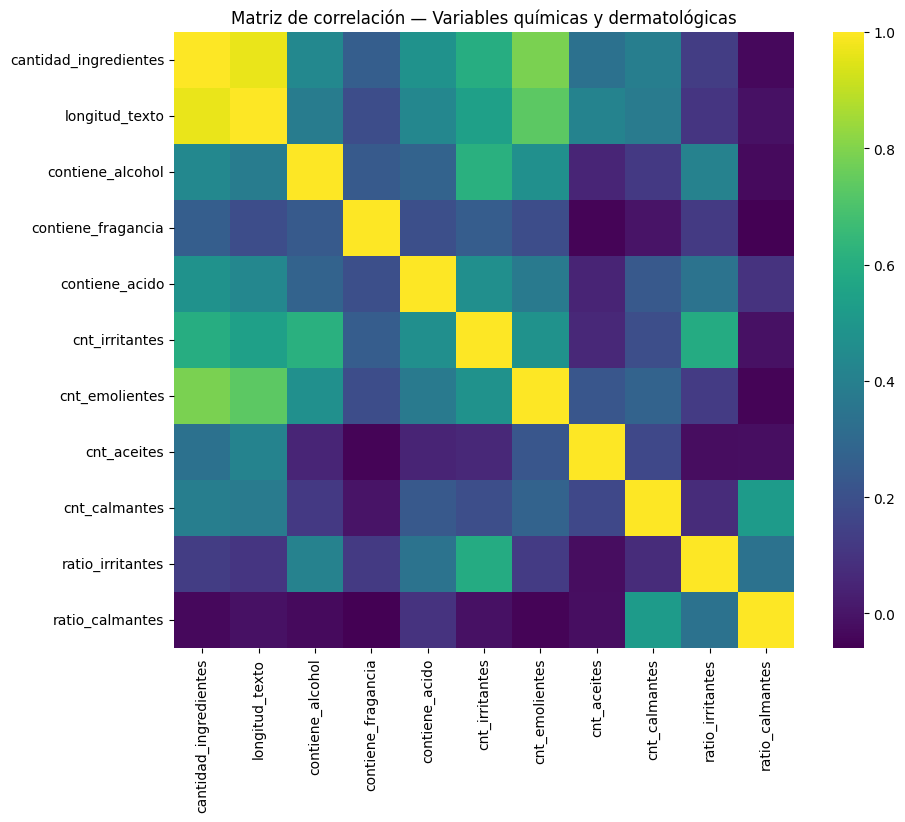

In [11]:
variables = [
    "cantidad_ingredientes","longitud_texto","contiene_alcohol",
    "contiene_fragancia","contiene_acido","cnt_irritantes",
    "cnt_emolientes","cnt_aceites","cnt_calmantes",
    "ratio_irritantes","ratio_calmantes"
]

plt.figure(figsize=(10,8))
sns.heatmap(datos[variables].corr(), annot=False, cmap="viridis")
plt.title("Matriz de correlación — Variables químicas y dermatológicas")
plt.show()


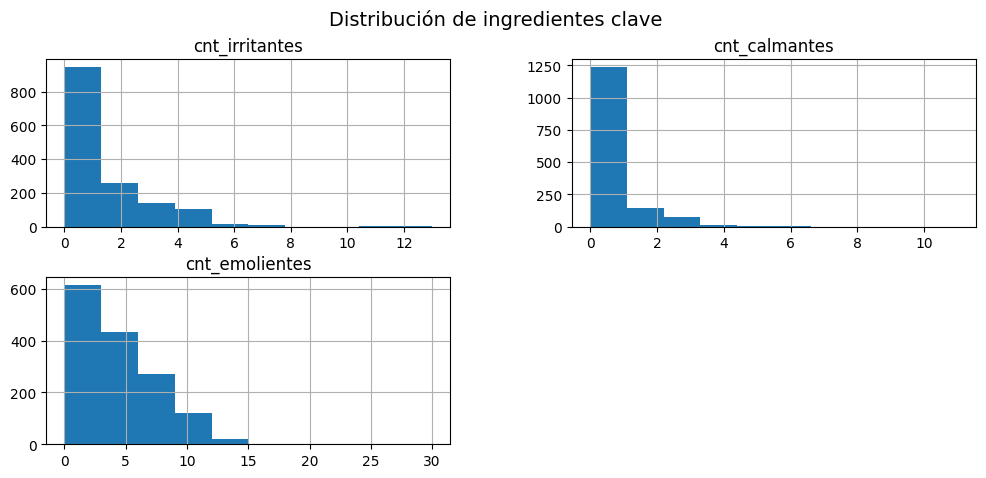

In [12]:
datos[["cnt_irritantes","cnt_calmantes","cnt_emolientes"]].hist(figsize=(12,5))
plt.suptitle("Distribución de ingredientes clave", fontsize=14)
plt.show()


In [14]:
ruta_out = "../data/processed/cosmetics_processed.csv"
datos.to_csv(ruta_out, index=False)
print("Dataset procesado guardado en:", ruta_out)


Dataset procesado guardado en: ../data/processed/cosmetics_processed.csv
